<a href="https://colab.research.google.com/github/ngo-quang-bao/CS2225.CH1501/blob/master/FaceDetectionFromWebCam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

Saved to photo.jpg


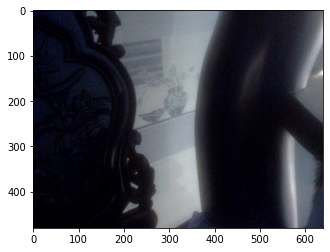

In [68]:
#@title Default title text
import cv2
import sys
import logging as log
import datetime as dt
from time import sleep
from matplotlib import pyplot as plt
from IPython.display import Image
from google.colab.patches import cv2_imshow

cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
log.basicConfig(filename='webcam.log',level=log.INFO)

anterior = 0

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Capture frame-by-frame
  frame = cv2.imread(filename)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  
  faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

  # Draw a rectangle around the faces
  for (x, y, w, h) in faces:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

  if anterior != len(faces):
      anterior = len(faces)
      log.info("faces: "+str(len(faces))+" at "+str(dt.datetime.now()))

  plt.imshow(frame)
  plt.show()
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotAllowedError: The request is not allowed by the user agent or the platform in the current context, possibly because the user denied permission.
